In [2]:
#Install necessary libraries
!pip install yfinance numpy pandas matplotlib seaborn PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.6 MB/s eta 0:00:00


In [3]:
#import necesaary packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pypfopt import expected_returns, risk_models, BlackLittermanModel, EfficientFrontier, plotting

In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/dataset_for_PO - Sheet1.csv")

In [4]:
data

,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,GOOG,MO,AMZN,AMCR,AEE,AEP,AXP,AIG,AMT,AWK
0,02-01-2024,88.02459,79.33628,106.6445,151.3448,338.3089,580.07,138.58,17.96418,80.62386,...,138.9021,37.61351,149.93,9.160178,71.02528,78.48366,185.0311,67.07451,209.9158,128.9554
1,03-01-2024,86.25610,76.67680,106.3241,151.9508,329.5323,571.79,135.32,17.58335,80.53673,...,139.6983,37.45068,148.47,9.019252,70.70855,78.67236,183.0758,66.85041,205.9633,128.9554
2,04-01-2024,86.56019,77.32949,107.7415,152.8978,328.7229,567.05,136.01,17.52761,79.67510,...,137.3893,37.55922,144.57,9.056833,70.93891,78.68179,184.4756,66.86989,206.7020,127.2651
3,05-01-2024,86.89628,76.99828,107.5668,153.5417,328.2645,564.60,138.58,17.46259,80.08171,...,136.7423,37.53209,145.24,9.150784,71.07327,79.32340,186.3682,67.24014,205.5700,127.3906
4,08-01-2024,87.11233,77.22234,109.1201,152.8693,331.9019,580.55,146.18,17.71338,80.22694,...,139.8675,37.91202,149.10,9.216548,71.65874,79.73856,186.5161,66.47041,207.2968,128.5014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,24-12-2024,129.08790,68.19430,113.6345,176.6856,358.3228,447.94,126.29,12.59110,102.10190,...,197.3452,51.52200,229.05,9.372294,90.23981,90.70486,301.7465,72.48951,181.5895,124.2079
248,26-12-2024,129.89990,68.19430,114.1395,175.9003,357.1338,450.16,125.06,12.41703,102.51730,...,196.8757,51.66935,227.05,9.342667,90.04124,90.40045,302.2734,72.98710,180.8718,124.6327
249,27-12-2024,128.90960,67.73895,113.8623,174.7322,352.9226,446.48,125.19,12.32999,102.24040,...,193.8192,51.45324,223.75,9.322914,89.47532,90.84235,299.3500,72.64874,180.3858,123.7733
250,30-12-2024,127.86990,67.33308,111.6938,172.9556,349.2664,445.80,122.44,12.23329,101.83490,...,192.4707,51.15855,221.30,9.224154,88.97890,90.40045,295.6510,72.20091,180.4354,122.7360


In [5]:
data.isnull().sum()

,0
Date,0
MMM,0
AOS,0
ABT,0
ABBV,0
ACN,0
ADBE,0
AMD,0
AES,0
AFL,0


This implies no missing values

In [6]:
data.dtypes

,0
Date,object
MMM,float64
AOS,float64
ABT,float64
ABBV,float64
ACN,float64
ADBE,float64
AMD,float64
AES,float64
AFL,float64


In [8]:
#Convert Date to "datetime[64]ns"
data['Date'] = pd.to_datetime(data['Date'],format='mixed')

In [9]:
data.dtypes

,0
Date,datetime64[ns]
MMM,float64
AOS,float64
ABT,float64
ABBV,float64
ACN,float64
ADBE,float64
AMD,float64
AES,float64
AFL,float64


In [10]:
data.shape

(252, 31)

In [11]:
data.describe()

,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,GOOG,MO,AMZN,AMCR,AEE,AEP,AXP,AIG,AMT,AWK
count,252,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2024-07-03 19:25:42.857142784,106.565312,79.941261,109.496028,171.620023,334.437044,524.843333,157.664484,16.209989,92.924888,...,164.693343,44.613228,184.628690,9.673467,76.584405,87.723482,241.971039,73.140885,198.172835,128.722616
min,2024-01-02 00:00:00,73.956660,67.333080,98.623790,149.364000,276.837400,437.390000,118.880000,12.030200,73.769670,...,131.935100,35.939980,144.570000,8.342808,65.189680,72.463870,177.230200,65.038110,165.522900,110.576100
25%,2024-04-05 12:00:00,88.551893,77.529088,104.688825,161.118975,311.331525,485.380000,144.427500,15.165000,81.979308,...,152.768900,39.329175,175.380000,8.979468,69.413528,80.231710,220.135375,71.713025,185.723325,120.034425
50%,2024-07-05 12:00:00,100.494250,80.091135,110.571500,169.763600,337.345600,520.165000,157.615000,16.307930,87.905395,...,165.878250,43.687825,183.430000,9.650558,72.262745,87.914540,236.366700,73.561825,194.081750,128.707750
75%,2024-10-04 06:00:00,128.350775,83.701320,113.872200,184.795050,357.753050,560.315000,168.652500,17.506305,106.064225,...,176.020400,49.166078,189.742500,10.266253,84.885900,95.037760,266.978100,75.530893,213.175400,137.377725
max,2024-12-31 00:00:00,137.348800,90.303860,118.219100,200.116000,378.684000,634.760000,211.380000,20.629410,113.476500,...,197.934500,55.636440,232.930000,11.089970,93.608080,102.063100,303.844500,78.848470,237.003300,147.244800
std,NaN,21.032203,4.832739,5.210754,12.985224,26.861321,46.749984,18.140938,1.983606,12.341070,...,15.538113,5.808896,17.427537,0.784178,8.404677,8.203509,32.007295,3.178890,17.466526,9.432216


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   MMM     252 non-null    float64       
 2   AOS     252 non-null    float64       
 3   ABT     252 non-null    float64       
 4   ABBV    252 non-null    float64       
 5   ACN     252 non-null    float64       
 6   ADBE    252 non-null    float64       
 7   AMD     252 non-null    float64       
 8   AES     252 non-null    float64       
 9   AFL     252 non-null    float64       
 10  A       252 non-null    float64       
 11  APD     252 non-null    float64       
 12  ABNB    252 non-null    float64       
 13  AKAM    252 non-null    float64       
 14  ALB     252 non-null    float64       
 15  ARE     252 non-null    float64       
 16  ALGN    252 non-null    float64       
 17  ALLE    252 non-null    float64       
 18  LNT     25

# **Some Visualizations**

Text(0.5, 1.0, 'Stock Return Correlation Matrix')

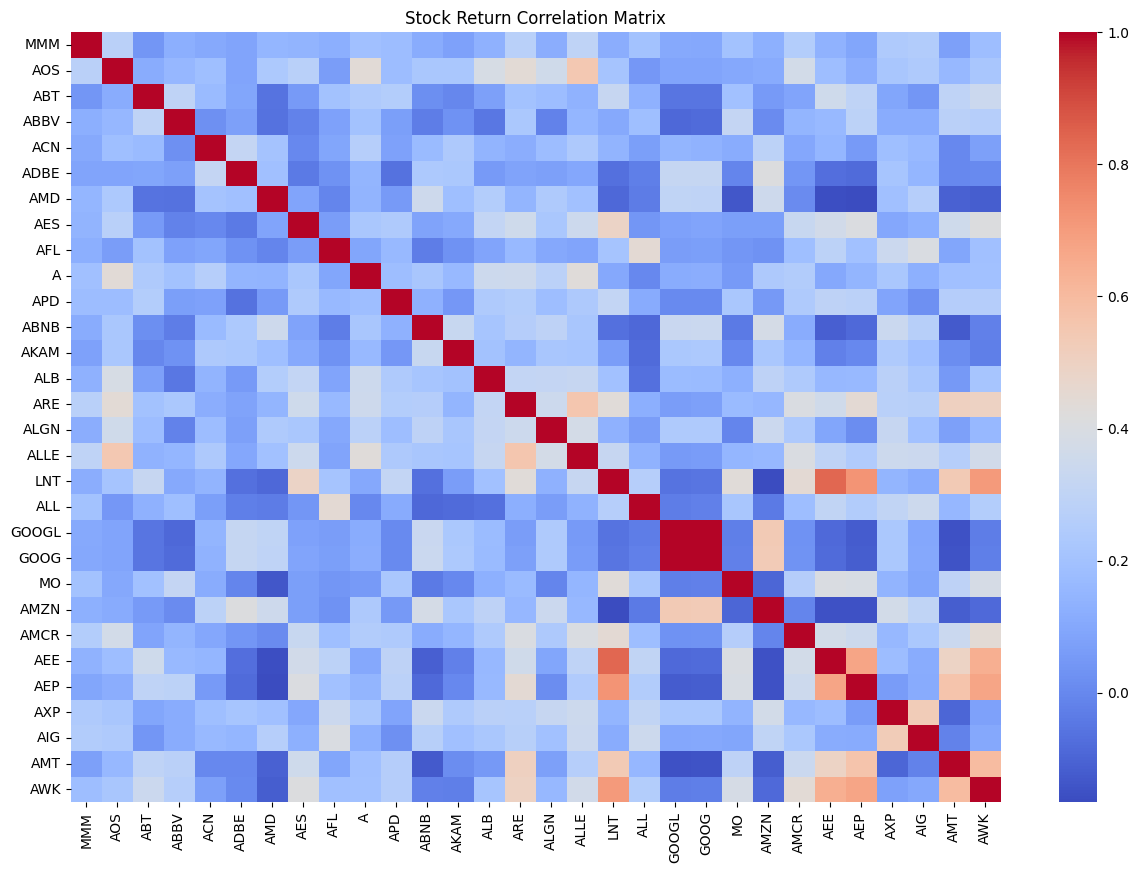

In [19]:
#Understand inter-stock relationship using correlation heatmap
returns = data.drop('Date',axis =1).pct_change().dropna()

correlation_matrix = returns.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Stock Return Correlation Matrix")

Text(0.5, 0, 'Volatility')

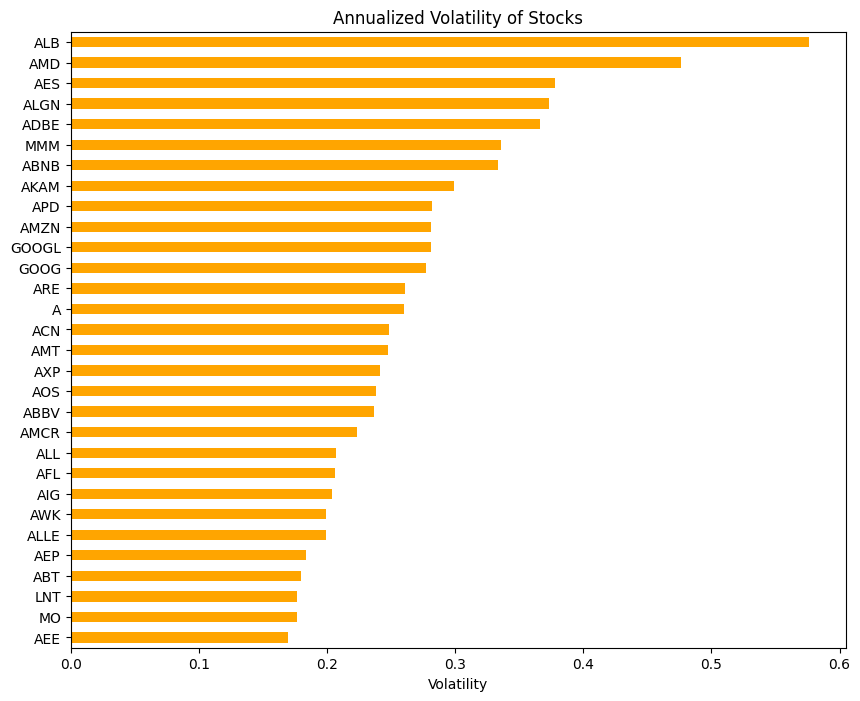

In [20]:
#To identify low and high risk stocks: We plot Volatility chart
volatility = returns.std() * np.sqrt(252)  # Annualized volatility
volatility.sort_values().plot(kind="barh", figsize=(10, 8), color="orange")
plt.title("Annualized Volatility of Stocks")
plt.xlabel("Volatility")

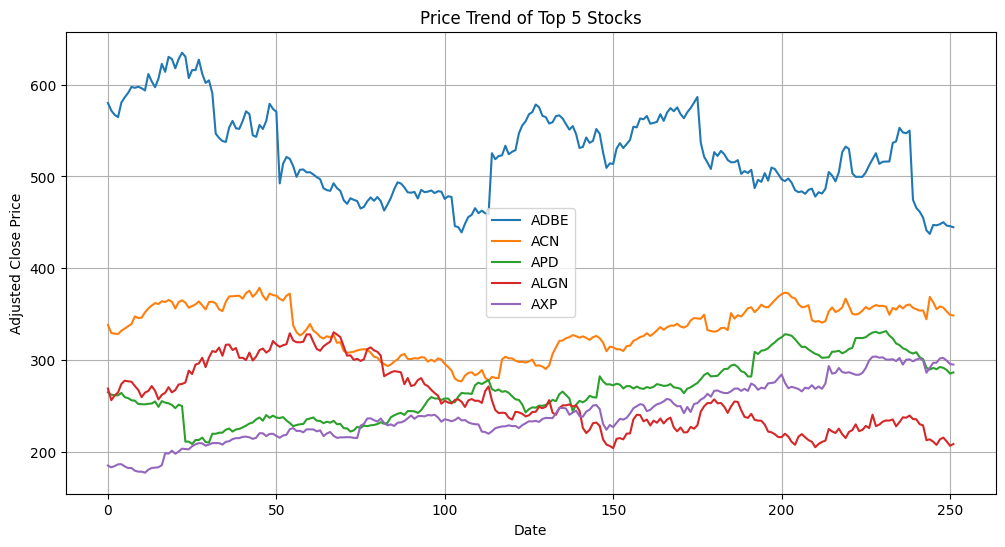

In [23]:
#Price Trend of top 5 stocks
import matplotlib.pyplot as plt
import pandas as pd

price_data = data.drop('Date', axis=1)
# Top 5 stocks by average price
top5 = price_data.mean().sort_values(ascending=False).head(5).index.tolist()

# Plot price trends
data[top5].plot(figsize=(12, 6))
plt.title("Price Trend of Top 5 Stocks")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.grid(True)
plt.show()

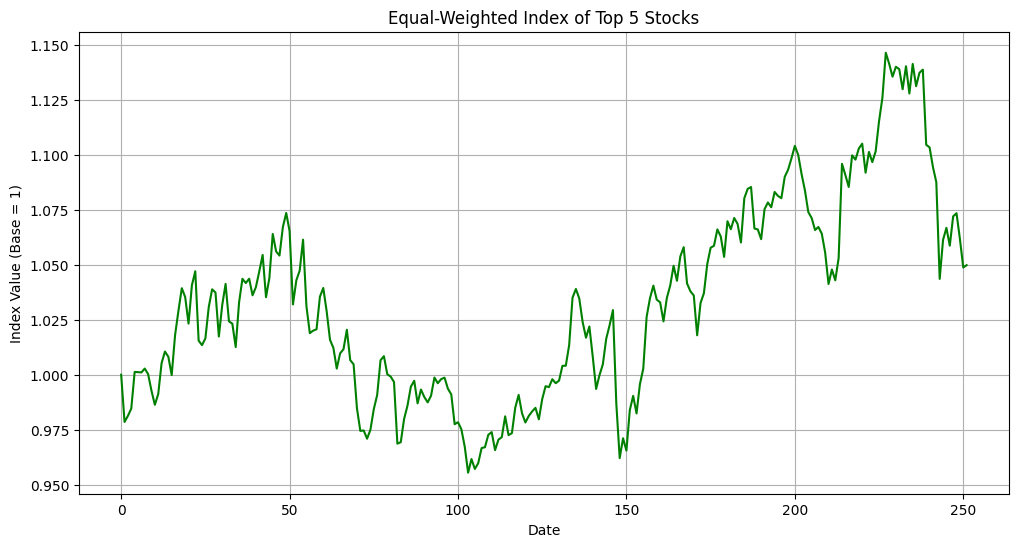

In [24]:
#Comnstruct an equal- weighted index and plot its trend

# Normalize all prices (starting at 1)
normalized = data[top5] / data[top5].iloc[0]

# Equal-weighted index (mean of normalized prices)
equal_weighted_index = normalized.mean(axis=1)

# Plot index
plt.figure(figsize=(12, 6))
equal_weighted_index.plot(color='green')
plt.title("Equal-Weighted Index of Top 5 Stocks")
plt.xlabel("Date")
plt.ylabel("Index Value (Base = 1)")
plt.grid(True)
plt.show()


# **Expected Returns and Covariance Matrix**

In [30]:
data.set_index("Date", inplace=True)   # Only if "Date" is a column
data.index = pd.to_datetime(data.index)

In [31]:
data

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,GOOG,MO,AMZN,AMCR,AEE,AEP,AXP,AIG,AMT,AWK
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01,88.02459,79.33628,106.6445,151.3448,338.3089,580.07,138.58,17.96418,80.62386,137.5018,...,138.9021,37.61351,149.93,9.160178,71.02528,78.48366,185.0311,67.07451,209.9158,128.9554
2024-03-01,86.25610,76.67680,106.3241,151.9508,329.5323,571.79,135.32,17.58335,80.53673,129.9801,...,139.6983,37.45068,148.47,9.019252,70.70855,78.67236,183.0758,66.85041,205.9633,128.9554
2024-04-01,86.56019,77.32949,107.7415,152.8978,328.7229,567.05,136.01,17.52761,79.67510,129.8215,...,137.3893,37.55922,144.57,9.056833,70.93891,78.68179,184.4756,66.86989,206.7020,127.2651
2024-05-01,86.89628,76.99828,107.5668,153.5417,328.2645,564.60,138.58,17.46259,80.08171,129.3854,...,136.7423,37.53209,145.24,9.150784,71.07327,79.32340,186.3682,67.24014,205.5700,127.3906
2024-08-01,87.11233,77.22234,109.1201,152.8693,331.9019,580.55,146.18,17.71338,80.22694,132.1801,...,139.8675,37.91202,149.10,9.216548,71.65874,79.73856,186.5161,66.47041,207.2968,128.5014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,129.08790,68.19430,113.6345,176.6856,358.3228,447.94,126.29,12.59110,102.10190,135.5609,...,197.3452,51.52200,229.05,9.372294,90.23981,90.70486,301.7465,72.48951,181.5895,124.2079
2024-12-26,129.89990,68.19430,114.1395,175.9003,357.1338,450.16,125.06,12.41703,102.51730,135.2920,...,196.8757,51.66935,227.05,9.342667,90.04124,90.40045,302.2734,72.98710,180.8718,124.6327
2024-12-27,128.90960,67.73895,113.8623,174.7322,352.9226,446.48,125.19,12.32999,102.24040,135.0031,...,193.8192,51.45324,223.75,9.322914,89.47532,90.84235,299.3500,72.64874,180.3858,123.7733


In [32]:
returns = data.pct_change().dropna()

In [33]:
from pypfopt.expected_returns import mean_historical_return

mu = mean_historical_return(price_data)
print(mu.head())

MMM     0.454371
AOS    -0.149471
ABT     0.050430
ABBV    0.153172
ACN     0.030462
dtype: float64


In [34]:
from pypfopt.risk_models import sample_cov

cov_matrix = sample_cov(data)
print(cov_matrix.head())

           MMM       AOS       ABT      ABBV       ACN      ADBE       AMD  \
MMM   0.112978  0.022334  0.002560  0.009822  0.008606  0.010482  0.023893   
AOS   0.022334  0.056625  0.004844  0.008815  0.011094  0.007657  0.026240   
ABT   0.002560  0.004844  0.032252  0.012603  0.007609  0.005895 -0.005166   
ABBV  0.009822  0.008815  0.012603  0.055987  0.001227  0.006223 -0.007401   
ACN   0.008606  0.011094  0.007609  0.001227  0.061596  0.028697  0.024372   

           AES       AFL         A  ...      GOOG        MO      AMZN  \
MMM   0.017728  0.008556  0.016688  ...  0.009556  0.011818  0.011964   
AOS   0.024796  0.003068  0.027011  ...  0.005784  0.004281  0.007481   
ABT   0.003865  0.007419  0.011253  ... -0.002643  0.006250  0.002673   
ABBV -0.001502  0.003884  0.012284  ... -0.005485  0.013094  0.000506   
ACN  -0.000062  0.004595  0.017064  ...  0.009534  0.004988  0.019926   

          AMCR       AEE       AEP       AXP       AIG       AMT       AWK  
MMM   0.019143 

# **Black- Litterman Model**

In [35]:
num_assets = len(data.columns)
market_weights = np.array([1 / num_assets] * num_assets)

# Confirm order matches data columns
tickers = data.columns.tolist()

In [37]:
#Fetch market cap data for our stocks
import yfinance as yf

tickers = data.columns.tolist()
market_caps = {}

for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info.get("marketCap", 1e9)  # fallback if missing

In [40]:
len(market_caps)

30

In [41]:
market_caps

{'MMM': 81814274048,
 'AOS': 9329455104,
 'ABT': 233799712768,
 'ABBV': 322032369664,
 'ACN': 184028135424,
 'ADBE': 163669082112,
 'AMD': 233173532672,
 'AES': 7631814656,
 'AFL': 56805568512,
 'A': 33852024832,
 'APD': 62835298304,
 'ABNB': 83027492864,
 'AKAM': 11329945600,
 'ALB': 7642081792,
 'ARE': 12692202496,
 'ALGN': 13664834560,
 'ALLE': 12381633536,
 'LNT': 15502466048,
 'ALL': 51840770048,
 'GOOGL': 2164997619712,
 'GOOG': 2164999979008,
 'MO': 98961440768,
 'AMZN': 2370642116608,
 'AMCR': 21057413120,
 'AEE': 25839683584,
 'AEP': 54733619200,
 'AXP': 222219829248,
 'AIG': 48751751168,
 'AMT': 101951086592,
 'AWK': 26896054272}

In [42]:
total_cap = sum(market_caps.values())
market_weights = np.array([market_caps[t]/total_cap for t in tickers])

In [45]:
import yfinance as yf

# Get S&P 500 as proxy for market
sp500 = yf.download("^GSPC", start="2024-02-01", end="2024-12-31", auto_adjust=False)["Adj Close"]

from pypfopt.black_litterman import market_implied_risk_aversion

delta = market_implied_risk_aversion(sp500)
print("Implied market risk aversion:", delta)

[*********************100%***********************]  1 of 1 completed

Implied market risk aversion: 12.983939159933634


In [48]:
pi = market_implied_prior_returns(market_caps, delta, cov_matrix)

As I am not an expert at Finance and Stock Markets and we are not going into Technical and Fundamental Analysis of each stock in detail, we will automate the process of generating views.
We will be making a simple assumption: "Top-performing stocks over the last 3 months will outperform the worst performers by 2%."

In [52]:
# Use 126 trading days ≈ 6 months
six_month_returns = data.pct_change(periods=63).iloc[-1]

# Sort to get top and bottom performers
top2 = six_month_returns.sort_values(ascending=False).head(2)
bottom2 = six_month_returns.sort_values(ascending=True).head(2)

print("Top 2 performers:", top2.index.tolist())
print("Bottom 2 performers:", bottom2.index.tolist())


Top 2 performers: ['AMZN', 'GOOGL']
Bottom 2 performers: ['AES', 'AMD']


In [53]:
import numpy as np

tickers = data.columns.tolist()
num_assets = len(tickers)

# Prepare P and Q
P = np.zeros((2, num_assets))
Q = np.array([0.02, 0.015])  # Your belief strength in return difference

# View 1: top1 - bottom1
P[0][tickers.index(top2.index[0])] = 1
P[0][tickers.index(bottom2.index[0])] = -1

# View 2: top2 - bottom2
P[1][tickers.index(top2.index[1])] = 1
P[1][tickers.index(bottom2.index[1])] = -1

In [55]:
from pypfopt.black_litterman import BlackLittermanModel

view_confidences = [0.6, 0.55]

bl = BlackLittermanModel(
    cov_matrix=cov_matrix,
    pi=pi,
    P=P,
    Q=Q,
    omega="idzorek",
    view_confidences=view_confidences,
    risk_aversion=delta
)

mu_bl = bl.bl_returns()
cov_bl = bl.bl_cov()

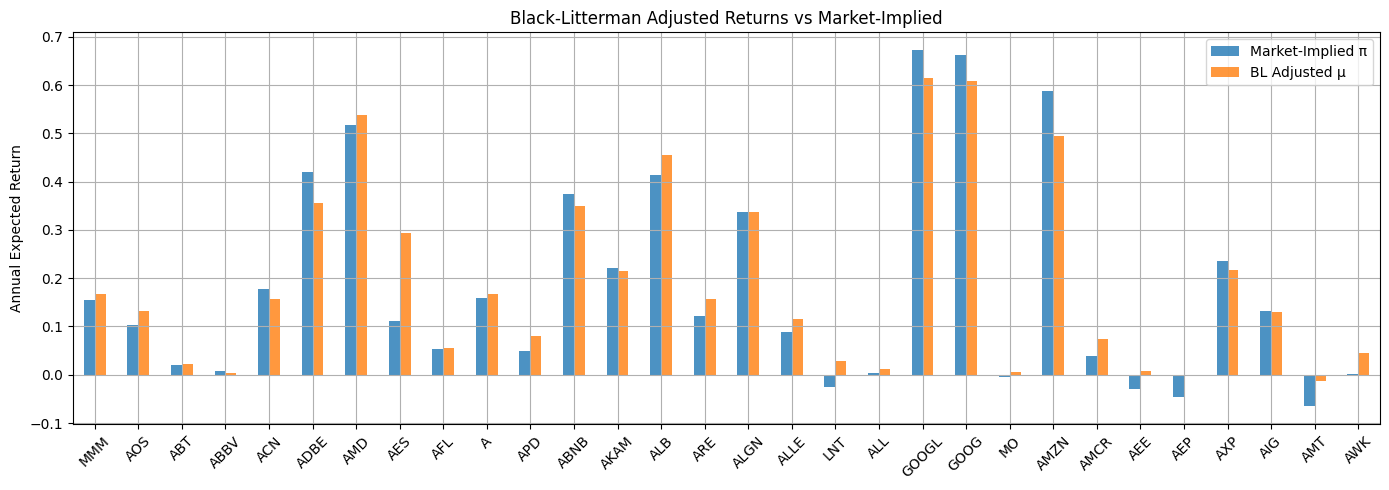

In [56]:
import matplotlib.pyplot as plt

compare_df = pd.DataFrame({
    "Market-Implied π": pi,
    "BL Adjusted μ": mu_bl
})

compare_df.plot(kind="bar", figsize=(14, 5), alpha=0.8)
plt.title("Black-Litterman Adjusted Returns vs Market-Implied")
plt.ylabel("Annual Expected Return")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Portfolio Opttimization Using MPT**

In [57]:
from pypfopt import EfficientFrontier

# Set up the optimizer with BL-adjusted data
ef = EfficientFrontier(mu_bl, cov_bl)

In [58]:
weights = ef.max_sharpe(risk_free_rate=0.02)

In [59]:
from pypfopt import discrete_allocation

cleaned_weights = ef.clean_weights()
print("Optimized Portfolio Weights:")
print(cleaned_weights)

Optimized Portfolio Weights:
OrderedDict([('MMM', 0.00804), ('AOS', 0.0), ('ABT', 0.0), ('ABBV', 0.02836), ('ACN', 0.01215), ('ADBE', 0.02206), ('AMD', 0.05615), ('AES', 0.11358), ('AFL', 0.0), ('A', 0.0), ('APD', 0.0026), ('ABNB', 0.00366), ('AKAM', 0.0), ('ALB', 0.00512), ('ARE', 0.0111), ('ALGN', 0.00413), ('ALLE', 0.0), ('LNT', 0.0), ('ALL', 0.0), ('GOOGL', 0.23709), ('GOOG', 0.28475), ('MO', 0.0), ('AMZN', 0.1891), ('AMCR', 0.0), ('AEE', 0.0), ('AEP', 0.0), ('AXP', 0.02211), ('AIG', 0.0), ('AMT', 0.0), ('AWK', 0.0)])


In [60]:
ef.portfolio_performance(verbose=True)

Expected annual return: 49.9%
Annual volatility: 21.3%
Sharpe Ratio: 2.25


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.49860862249527876),
 np.float64(0.2126354053380851),
 np.float64(2.2508416306978734))

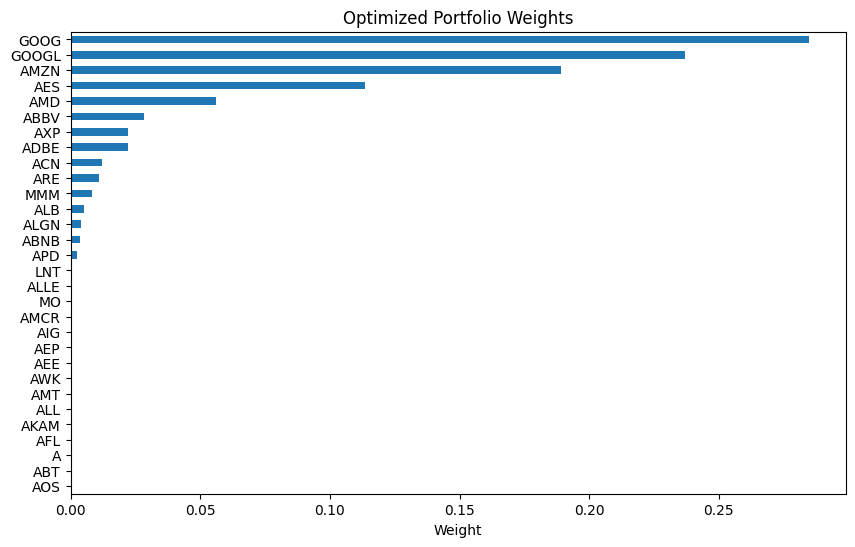

In [61]:
import matplotlib.pyplot as plt

pd.Series(cleaned_weights).sort_values().plot(kind="barh", figsize=(10, 6), title="Optimized Portfolio Weights")
plt.xlabel("Weight")
plt.show()

/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


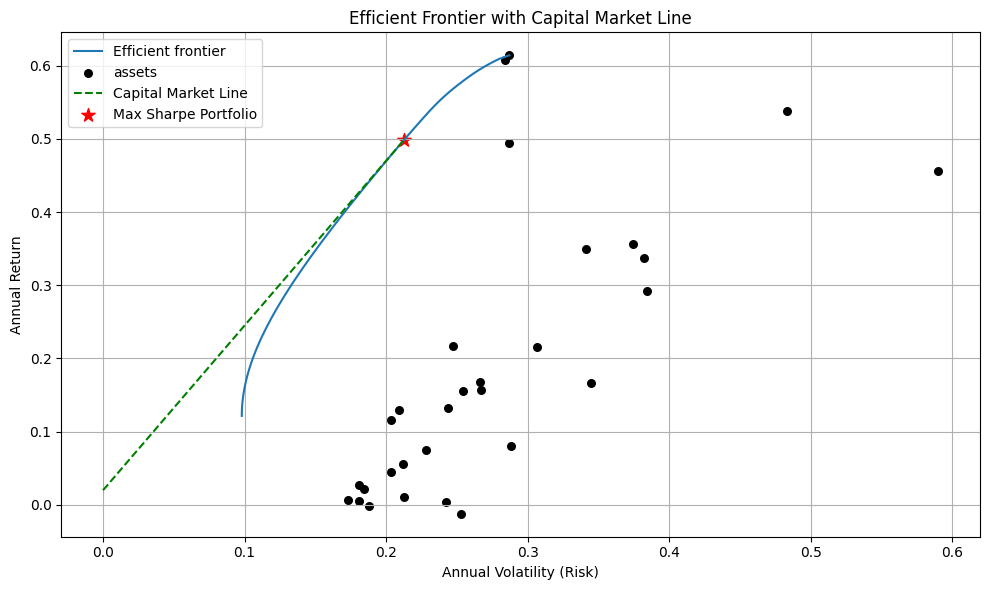

In [65]:
from pypfopt import EfficientFrontier, plotting

# Recreate the optimizer
ef = EfficientFrontier(mu_bl, cov_bl)

# Plot Efficient Frontier
fig, ax = plt.subplots(figsize=(10, 6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Max Sharpe portfolio
ef = EfficientFrontier(mu_bl, cov_bl)  # Re-instantiate again for max_sharpe
ef.max_sharpe(risk_free_rate=0.02)
ret_tangent, std_tangent, _ = ef.portfolio_performance()

# Plot CML
ax.plot([0, std_tangent], [0.02, ret_tangent], linestyle="--", color="green", label="Capital Market Line")

# Plot the tangency point
ax.scatter(std_tangent, ret_tangent, marker="*", color="red", s=100, label="Max Sharpe Portfolio")

# Final touches
ax.set_title("Efficient Frontier with Capital Market Line")
ax.set_xlabel("Annual Volatility (Risk)")
ax.set_ylabel("Annual Return")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Backtesting and Validation**

In [72]:
# Convert weights to a NumPy array aligned with your data columns
weight_vector = np.array([cleaned_weights.get(t, 0) for t in data.columns])

# Daily returns of stocks
daily_returns = data.pct_change().dropna()

# Portfolio daily returns
portfolio_returns = pd.Series(daily_returns.dot(weight_vector), index=daily_returns.index)

In [73]:
equal_weights = np.repeat(1/len(data.columns), len(data.columns))
equal_returns = pd.Series(daily_returns.dot(equal_weights), index=daily_returns.index)

In [76]:
import yfinance as yf

benchmark = yf.download("^GSPC", start=data.index[0], end=data.index[-1], auto_adjust=False)["Adj Close"]
benchmark_returns = benchmark.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [82]:
benchmark_returns = pd.Series(benchmark.pct_change().dropna()['^GSPC'], index=benchmark.pct_change().dropna().index)

In [83]:
print(type(benchmark_returns))
print(benchmark_returns.shape)

<class 'pandas.core.series.Series'>
(229,)


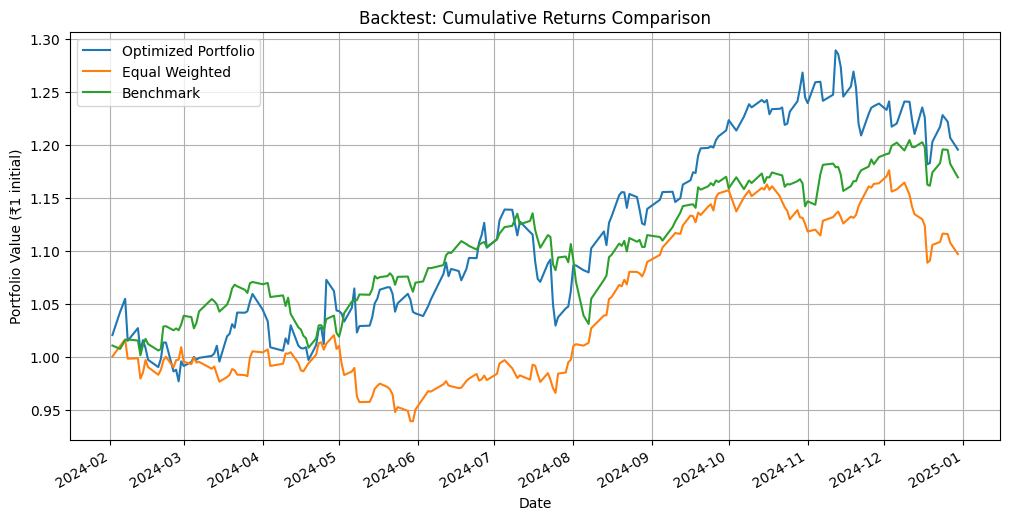

In [84]:
import matplotlib.pyplot as plt

# Align all
combined_df = pd.DataFrame({
    "Optimized Portfolio": portfolio_returns,
    "Equal Weighted": equal_returns,
    "Benchmark": benchmark_returns
}).dropna()

# Cumulative returns
cumulative = (1 + combined_df).cumprod()

# Plot
cumulative.plot(figsize=(12, 6), title="Backtest: Cumulative Returns Comparison")
plt.ylabel("Portfolio Value (₹1 initial)")
plt.grid(True)
plt.show()

In [85]:
def performance_metrics(returns, name="Portfolio"):
    total_return = (1 + returns).prod() - 1
    annual_return = (1 + total_return)**(252 / len(returns)) - 1
    annual_volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (annual_return - 0.02) / annual_volatility

    print(f"📊 {name}")
    print(f" - Annual Return    : {annual_return:.2%}")
    print(f" - Annual Volatility: {annual_volatility:.2%}")
    print(f" - Sharpe Ratio     : {sharpe_ratio:.2f}")
    print()

performance_metrics(portfolio_returns, "Optimized Portfolio")
performance_metrics(equal_returns, "Equal Weighted")
performance_metrics(benchmark_returns, "Benchmark Index")

📊 Optimized Portfolio
 - Annual Return    : 24.66%
 - Annual Volatility: 20.76%
 - Sharpe Ratio     : 1.09

📊 Equal Weighted
 - Annual Return    : 8.10%
 - Annual Volatility: 12.05%
 - Sharpe Ratio     : 0.51

📊 Benchmark Index
 - Annual Return    : 22.66%
 - Annual Volatility: 12.79%
 - Sharpe Ratio     : 1.62

